# <center>CHALLENGE 3<center>

<p>Team Name: Morse Coders
<p>Student Names: Aubrey Merritt and Carrington Wynn
<p>Student W#s: W0749642 and W0731024

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

Load "titanic.csv" into the data frame object "data"</br>
[train.csv](https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/titanic/train.csv)

In [109]:
url = ("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/train.csv")


info = pd.read_csv(url)

#are we supposed to have the syntax: 
data = pd.DataFrame(info)
#since we want 'data' to be a data frame opject?

print(data) # checking

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Data Processing

Create a data frame object "pasUpto19".
> Columns of pasUpto19 = {AGE_12, AGE_TEEN, PCLASS}.<br>
> AGE_12 : Passengers with age in \[1, 12]<br>
> AGE_TEEN : Passengers with age in \[13, 19]<br>

In [110]:
pd.options.mode.chained_assignment = None # default='warn'

pasUpto19 = pd.DataFrame(zip(data[data["Age"].between(1,19)].Age, data[data["Age"].between(1,19)].Age, data[data["Age"].between(1,19)].Pclass), columns = ['AGE_12', 'AGE_TEEN','Pclass'])

pasUpto19.AGE_12.iloc[pasUpto19[pasUpto19["AGE_12"].between(13,19)].index] = None
pasUpto19.AGE_TEEN.iloc[pasUpto19[pasUpto19["AGE_TEEN"].between(1,12)].index] = None

print(pasUpto19)

#1st data is calling dataframe 
#2nd data is calling the specific column 'Age' within the dataframe that have the ages bettween 1 -19
#.Age is retreving the actual column from the data DataFrame 
#'Age' is retreving the reference of the Age column so we can retreive the age ranges that we need 
# 157 is the number of passangers

     AGE_12  AGE_TEEN  Pclass
0       2.0       NaN       3
1       NaN      14.0       2
2       4.0       NaN       3
3       NaN      14.0       3
4       2.0       NaN       3
..      ...       ...     ...
152     NaN      18.0       3
153     4.0       NaN       3
154     NaN      15.0       3
155     NaN      19.0       3
156     NaN      19.0       1

[157 rows x 3 columns]


Display 5 rows below and above the middle row of "pasUpto19":

In [111]:
userInput = input("Enter how many rows you want to display from the middle: ")
rowRange = int(userInput)
row = int((len(pasUpto19))/2)
count= rowRange

print("Middle row index value is: ", row, "\n")

for i in range(1,rowRange+1):
    print(pasUpto19.loc[[row-count]], "\n")
    count = count - 1
    print(" ")
#

print("\n", "------Middle------" ,"\n\n")

for i in range(1,rowRange+1):
    print(pasUpto19.loc[[row+i]], "\n")
#

Enter how many rows you want to display from the middle: 5
Middle row index value is:  78 

    AGE_12  AGE_TEEN  Pclass
73     1.0       NaN       3 

 
    AGE_12  AGE_TEEN  Pclass
74     NaN      18.0       2 

 
    AGE_12  AGE_TEEN  Pclass
75     1.0       NaN       3 

 
    AGE_12  AGE_TEEN  Pclass
76     NaN      17.0       2 

 
    AGE_12  AGE_TEEN  Pclass
77     3.0       NaN       2 

 

 ------Middle------ 


    AGE_12  AGE_TEEN  Pclass
79    10.0       NaN       3 

    AGE_12  AGE_TEEN  Pclass
80     NaN      18.0       3 

    AGE_12  AGE_TEEN  Pclass
81     NaN      19.0       2 

    AGE_12  AGE_TEEN  Pclass
82     NaN      17.0       3 

    AGE_12  AGE_TEEN  Pclass
83     NaN      14.0       1 



Group pasUpto19 by AGE_TEEN:

In [112]:
groupedAgeTeen = pasUpto19.groupby(["AGE_TEEN"]).Pclass

Get the mean of PCLASS for each group of AGE_TEEN and display the mean by age groups:

In [113]:
groupedAgeTeen.mean()

AGE_TEEN
13.0    2.500000
14.0    2.500000
14.5    3.000000
15.0    2.600000
16.0    2.529412
17.0    2.384615
18.0    2.461538
19.0    2.360000
Name: Pclass, dtype: float64

Sort "pasUpto19" by the age of teenages and store into a DF object "pasUpto19_sortTeen":

In [114]:
pasUpto19_sortTeen = pd.DataFrame(pasUpto19).sort_values(by=['AGE_TEEN'])
print(pasUpto19_sortTeen)

     AGE_12  AGE_TEEN  Pclass
133     NaN      13.0       3
85      NaN      13.0       2
114     NaN      14.0       3
113     NaN      14.0       3
83      NaN      14.0       1
..      ...       ...     ...
143     2.0       NaN       3
144     1.0       NaN       2
149     4.0       NaN       3
150     9.0       NaN       3
153     4.0       NaN       3

[157 rows x 3 columns]


## Summarize Data

Create "pasUpto19_stat" an object from the statistics of pasUpto19. Use the method describe(). Print the statistics.

In [115]:
pasUpto19_stat = pd.DataFrame(pasUpto19).describe()
print(pasUpto19_stat)

          AGE_12   AGE_TEEN      Pclass
count  62.000000  95.000000  157.000000
mean    5.225806  17.215789    2.541401
std     3.276440   1.633513    0.711539
min     1.000000  13.000000    1.000000
25%     2.000000  16.000000    2.000000
50%     4.000000  18.000000    3.000000
75%     8.000000  19.000000    3.000000
max    12.000000  19.000000    3.000000


Store each statistics of pasUpto19_stat into a multi-dimensional list "pasUpto19_stat_lst" individually. Print the list.

In [116]:
pasUpto19_stat_lst = pasUpto19_stat.to_xarray()
print(pasUpto19_stat_lst)

<xarray.Dataset>
Dimensions:   (index: 8)
Coordinates:
  * index     (index) object 'count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max'
Data variables:
    AGE_12    (index) float64 62.0 5.226 3.276 1.0 2.0 4.0 8.0 12.0
    AGE_TEEN  (index) float64 95.0 17.22 1.634 13.0 16.0 18.0 19.0 19.0
    Pclass    (index) float64 157.0 2.541 0.7115 1.0 2.0 3.0 3.0 3.0


Print rows where AGE_12 >= mean of AGE_12 or AGE_TEEN >= mean AGE_TEEN.

In [117]:
#find the mean of either Age_12 or Age_Teen 
#display the rows that have greater or equal the mean 
#possible function iterrows()

meanOfAge12 = pd.DataFrame(columns = ['AGE_12', 'AGE_TEEN','Pclass'] )
info = pasUpto19_stat.at["mean", "AGE_12"]
mean = float(info)

rows = len(pasUpto19)

print("Rows where AGE_12 >= mean of AGE_12: ")
print("Mean of AGE_12:",mean, "\n")

for i in range(rows):
    test = float(pasUpto19.at[i,"AGE_12"])
    if(test > mean):
        meanOfAge12.loc[len(meanOfAge12)] = pasUpto19.loc[i]
    #
#   
print(meanOfAge12)

Rows where AGE_12 >= mean of AGE_12: 
Mean of AGE_12: 5.225806451612903 

    AGE_12  AGE_TEEN  Pclass
0      8.0       NaN     3.0
1      7.0       NaN     3.0
2     11.0       NaN     3.0
3     12.0       NaN     3.0
4      9.0       NaN     3.0
5      9.0       NaN     3.0
6      9.0       NaN     3.0
7      8.0       NaN     2.0
8      7.0       NaN     3.0
9     10.0       NaN     3.0
10     9.0       NaN     3.0
11     9.0       NaN     3.0
12     7.0       NaN     2.0
13     9.0       NaN     3.0
14    11.0       NaN     3.0
15     8.0       NaN     2.0
16     9.0       NaN     3.0
17     6.0       NaN     2.0
18    11.0       NaN     3.0
19     6.0       NaN     3.0
20     8.0       NaN     3.0
21    11.0       NaN     1.0
22     6.0       NaN     3.0
23    10.0       NaN     3.0
24     9.0       NaN     3.0


## Use of method "eval(Age ...)"

<b>Sample Code Snippet:</b><br>
<p>
dic = {"x": pd.Series([2,-1,3,5], name="x"),
      "y": pd.Series((10,11,12), name="y")
      }<br>
df = pd.DataFrame(dic)<br>
print(df)<br>
df.eval("x == 5")
</p>

Get passengers whose age is in \[3,7) or in \[12, 15] and store into "pas3to6_12to15":

In [118]:
#[3,7) means 3 - 7 including 3 but not including 7 
#[12,15] means 12-15 including both 12 and 15

#inital creation of pas3to6_12to15 dataframe
pas3to6_12to15 = pd.DataFrame(zip(data[data["Age"].between(3,15)].Name, data[data["Age"].between(3,15)].Age, data[data["Age"].between(3,15)].Pclass), columns = ['Name', 'Age', 'Pclass'])

#evaluate dataframe and return boolean result on whether or not the age falls in the category 
pas3to6_12to15.eval('(3 <= Age < 7) or (12 <= Age <= 15)')

#drops the ages that does not fall in the categorey and return the passengers who does within the pas3to6_12to15 dataframe 
pas3to6_12to15.drop(pas3to6_12to15[pas3to6_12to15['Age'].between(7,11)].index)


,Name,Age,Pclass
0,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,2
1,"Sandstrom, Miss. Marguerite Rut",4.0,3
2,"Vestrom, Miss. Hulda Amanda Adolfina",14.0,3
3,"McGowan, Miss. Anna ""Annie""",15.0,3
5,"Nicola-Yarred, Miss. Jamila",14.0,3
6,"Laroche, Miss. Simonne Marie Anne Andree",3.0,2
8,"West, Miss. Constance Mirium",5.0,2
10,"Skoog, Master. Harald",4.0,3
11,"Zabour, Miss. Hileni",14.5,3
12,"Nicola-Yarred, Master. Elias",12.0,3


## Plots

Create a figure "Plots for Pclass and Age"<br>
Plot histograms for "PCLASS", "AGE_12", and "AGE_TEEN" side by side:

Text(0.5, 1.0, 'Plots for Ages 13-19')

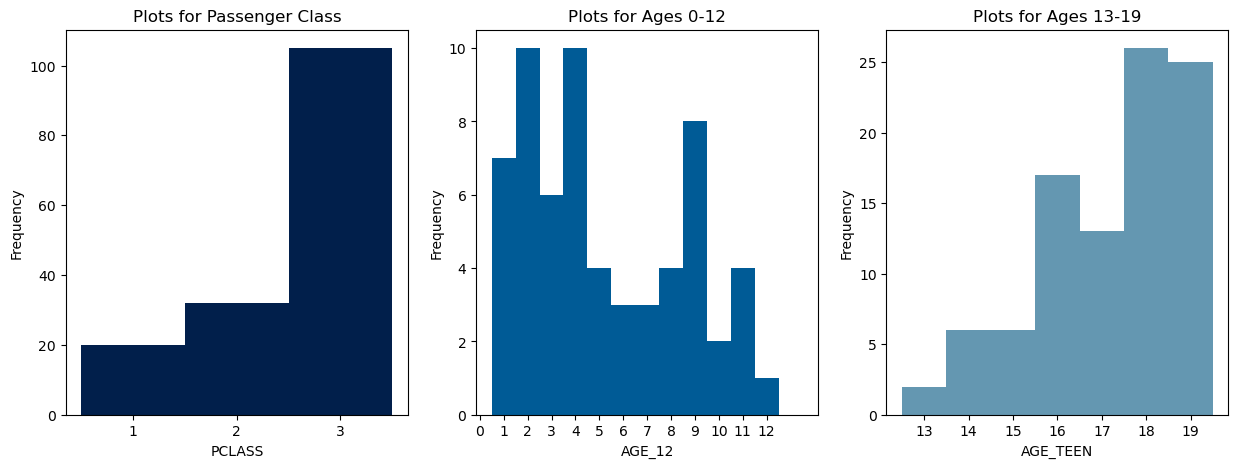

In [119]:
#Plotting PCLASS
plt.figure(figsize=(15,5),dpi=100)
alpha_bar_chart = 0.75


graph1 = plt.subplot2grid((1,3),(0,0))
                              # np.arrange(start,stop,steps inbetween)
plt.hist(pasUpto19.Pclass, bins=np.arange(0.5,4, 1), color='#011f4b')
graph1.set_xticks([1,2,3])
#labelling our axis and graph for PCLASS
plt.xlabel("PCLASS")
plt.ylabel("Frequency")
plt.title("Plots for Passenger Class")


#Plotting AGE_12
                         #(how close the graphs are)
graph3 = plt.subplot2grid((1,3),(0,1))
plt.hist(pasUpto19.AGE_12, bins=np.arange(0.5, 14, 1), color='#005b96')
graph3.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
#labelling our axis and graph for AGE_12
plt.xlabel("AGE_12")
plt.ylabel("Frequency")
plt.title("Plots for Ages 0-12")



#Plotting AGE_TEEN
graph2 = plt.subplot2grid((1,3),(0,2))
plt.hist(pasUpto19.AGE_TEEN, bins=np.arange(12.5, 20, 1), color='#6497b1')
graph2.set_xticks([13,14,15,16,17,18,19])
#labelling our axis and graph for AGE_TEEN
plt.xlabel("AGE_TEEN")
plt.ylabel("Frequency")
plt.title("Plots for Ages 13-19") 

Add a scatter plot for "PCLASS" vs. "AGE_12" into the first cell and "PCLASS" vs. "AGE_TEEN" into the last cell on the same figure at the second row:z

[Text(0.5, 1.0, 'PCLASS vs AGE_TEEN')]

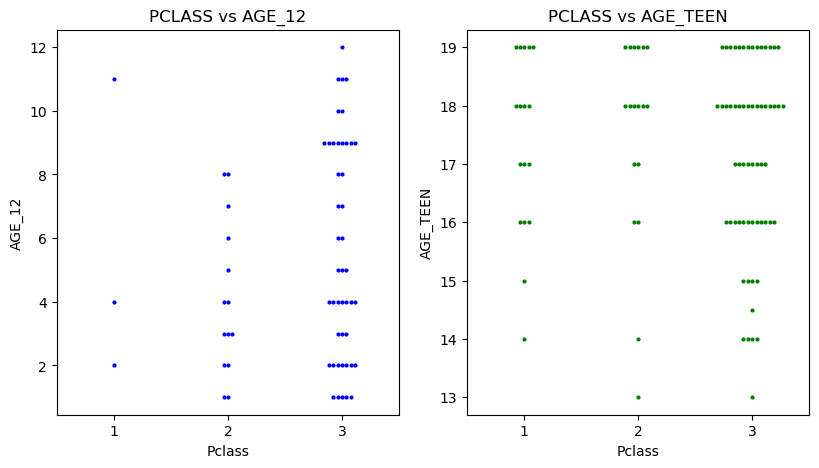

In [121]:
#swarmplot for pclass vs AGE_12

fig2 = plt.figure(figsize = (15,5), dpi = 100)
ax4 = plt.subplot2grid((1,3), (0,0))
sns.swarmplot(data = pasUpto19, x = 'Pclass', y = "AGE_12", color = 'blue', size = 3).set(title = 'PCLASS vs AGE_12')

#swarmplot for pclass vs AGE_TEEN

ax5 = plt.subplot2grid((1,3), (0,1))
sns.swarmplot(data = pasUpto19, x = 'Pclass', y = "AGE_TEEN", color = 'green', size = 3).set(title = 'PCLASS vs AGE_TEEN')


## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.


https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sas.html 

https://www.geeksforgeeks.org/split-pandas-dataframe-by-rows/ 

https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc

https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_xarray.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at

https://www.geeksforgeeks.org/zip-in-python/

https://www.geeksforgeeks.org/create-pandas-dataframe-from-lists-using-zip/

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange

https://www.w3schools.com/python/matplotlib_histograms.asp

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html#sphx-glr-gallery-subplots-axes-and-figures-multiple-figs-demo-py

https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange

https://github.com/matplotlib/matplotlib/blob/v3.8.3/lib/matplotlib/pyplot.py#L3680-L3717